In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('epi_r.csv')

In [3]:
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB
title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64


In [4]:
data.shape

(20052, 680)

In [5]:
data.head(10)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
threshold = len(data) * 0.5 # remove columns with more than 50% missing values
data_cleaned = data.dropna(axis=1, thresh=threshold)

In [7]:
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':  # For categorical columns
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
    else:  # For numerical columns
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)


In [8]:
data_cleaned.drop_duplicates(inplace=True)

In [9]:
for col in data_cleaned.select_dtypes(include='object').columns:
    data_cleaned[col] = data_cleaned[col].astype('category')

In [10]:
data_cleaned.shape

(18251, 680)

In [12]:
print(data_cleaned.isnull().sum())

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64


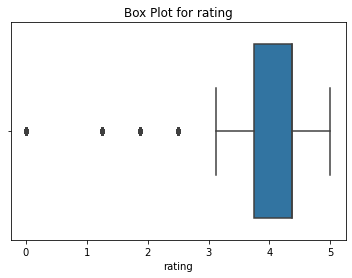

In [21]:
sns.boxplot(x=data_cleaned['rating'])
plt.title('Box Plot for rating')
plt.show()

In [51]:
numeric_cols = data_cleaned.select_dtypes(include='number')  


Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1


data_no_outliers = numeric_cols[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]


categorical_cols = data_cleaned.select_dtypes(exclude='number')
data_final = pd.concat([data_no_outliers, categorical_cols], axis=1)

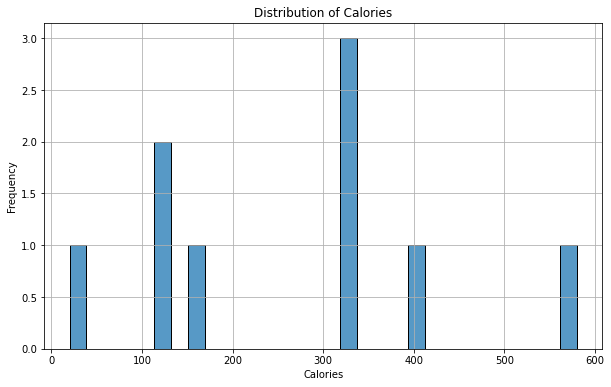

In [62]:
plt.figure(figsize=(10, 6))

sns.histplot(data_final['calories'], bins=30)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


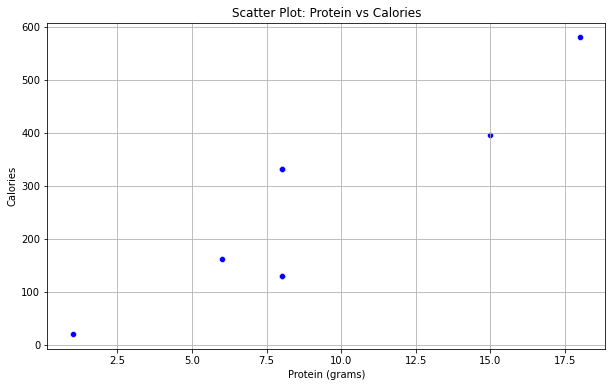

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='protein', y='calories', data=data_final, color='blue', marker='o')
plt.title('Scatter Plot: Protein vs Calories')
plt.xlabel('Protein (grams)')
plt.ylabel('Calories')
plt.grid(True)
plt.show()


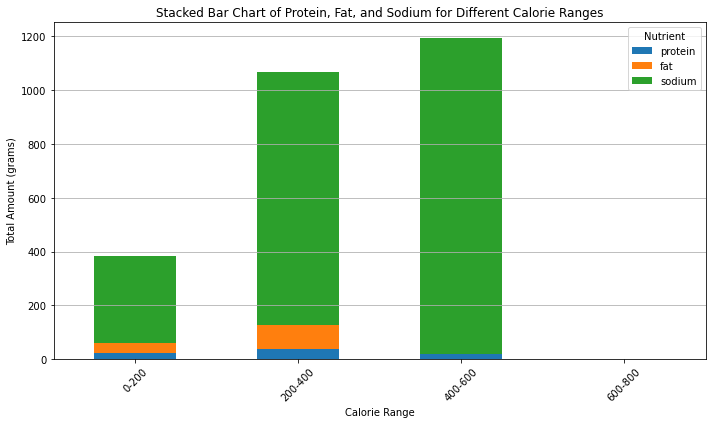

In [79]:


bins = [0, 200, 400, 600, 800] 
labels = ['0-200', '200-400', '400-600', '600-800']  
data_final['calorie_range'] = pd.cut(data_final['calories'], bins=bins, labels=labels)


grouped_data = data_final.groupby('calorie_range')[['protein', 'fat', 'sodium']].sum()


grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Stacked Bar Chart of Protein, Fat, and Sodium for Different Calorie Ranges')
plt.xlabel('Calorie Range')
plt.ylabel('Total Amount (grams)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()


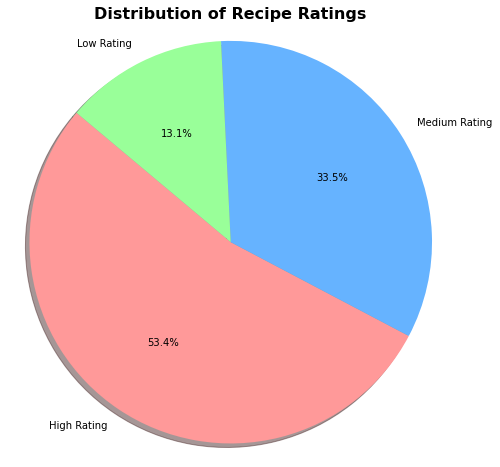

In [75]:

def rating_category(rating):
    if rating < 3:
        return 'Low Rating'
    elif 3 <= rating < 4:
        return 'Medium Rating'
    else:
        return 'High Rating'

data_cleaned['rating_category'] = data_cleaned['rating'].apply(rating_category)


ratings_count = data_final['rating_category'].value_counts()

plt.figure(figsize=(8, 8))


colors = ['#FF9999', '#66B3FF', '#99FF99'] 


plt.pie(ratings_count, 
        labels=ratings_count.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        shadow=True)

plt.title('Distribution of Recipe Ratings', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.show()


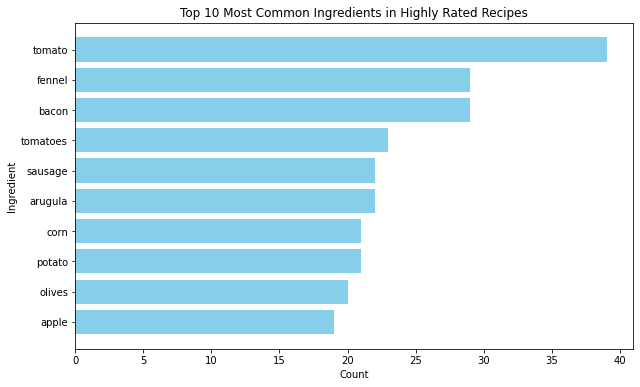

In [83]:

highly_rated_recipes = data_cleaned[data_cleaned['rating'] > 4.0]

ingredients_list = highly_rated_recipes['title'].astype(str).apply(lambda x: x.split(','))

all_ingredients = [ingredient.strip().lower() for sublist in ingredients_list for ingredient in sublist]
ingredient_counts = Counter(all_ingredients)


most_common_ingredients = ingredient_counts.most_common(10) 

ingredient_df = pd.DataFrame(most_common_ingredients, columns=['Ingredient', 'Count'])

plt.figure(figsize=(10, 6))
plt.barh(ingredient_df['Ingredient'], ingredient_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.title('Top 10 Most Common Ingredients in Highly Rated Recipes')
plt.gca().invert_yaxis()  
plt.show()
